In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
#Returns the number of jobs in the United States related to a specified technology
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

def get_number_of_jobs_T(technology):
    response = requests.get(api_url)
    if response.ok:
        data = response.json()
        filtered_jobs = [job for job in data if technology in job.get("Key Skills", "")]

        number_of_jobs = len(filtered_jobs)
        return number_of_jobs

In [3]:
#Test
technology = "Python"
num_jobs = get_number_of_jobs_T(technology)
if technology is not None and num_jobs is not None:
    print(f"Number of jobs related to {technology}: {num_jobs}")

Number of jobs related to Python: 1173


In [4]:
#Returns the number of jobs in the United States for a given location
def get_number_of_jobs_L(location):

    response = requests.get(api_url)
    if response.ok:
        data = response.json()
        filtered_jobs = [job for job in data if location in job.get("Location", "")]

        number_of_jobs = len(filtered_jobs)
        return len(filtered_jobs)

In [5]:
#Test
location = "Los Angeles"
jobs_num = get_number_of_jobs_L(location)
if jobs_num is not None:
    print(f"Number of jobs located in {location}: {jobs_num}")

Number of jobs located in Los Angeles: 640


In [6]:
locations = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]

In [7]:
pip install openpyxl

In [8]:
from openpyxl import Workbook

In [9]:
#Creates an excel workbook and worksheet to save the results
workbook = Workbook()
worksheet = workbook.active
worksheet.title = "Jobs"
worksheet.append(["Location", "Number of Jobs"])

In [10]:
for location in locations:
    num_jobs = get_number_of_jobs_L(location)
    if num_jobs is not None:
        worksheet.append([location, num_jobs])

In [11]:
worksheet.append([])

In [12]:
technologies = ["C", "C#", "C++", "Java", "JavaScript", "Python", "Scala", "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"]
worksheet.append(["Technologies", "Number of Jobs"])
for technology in technologies:
    tech = get_number_of_jobs_T(technology)
    if tech is not None:
        worksheet.append([technology, tech])

In [13]:
workbook.save("job_postings.xlsx")

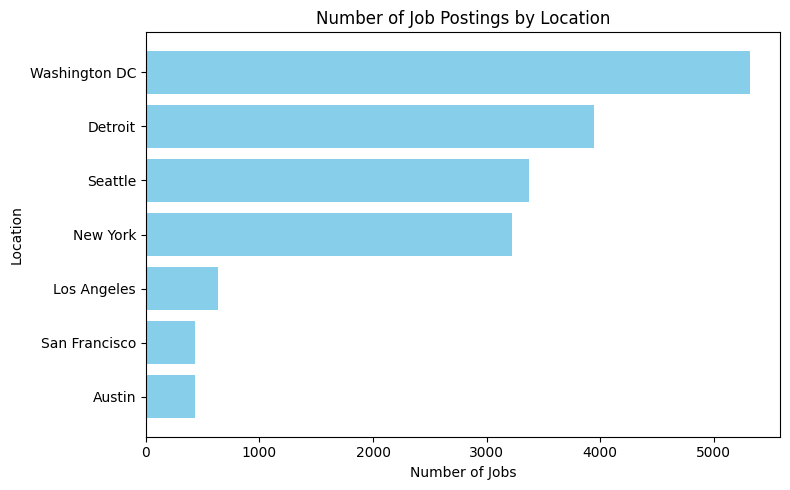

In [19]:
def get_number_of_jobs_L(locations):
    response = requests.get(api_url)
    if response.ok:
        data = response.json()
        jobs_count = {}
        for location in locations:
            count = 0
            for job in data:
                if location in job.get("Location", ""):
                    count += 1
            jobs_count[location] = count

        sorted_jobs_count = dict(sorted(jobs_count.items(), key=lambda item: item[1], reverse=True))
        return sorted_jobs_count

def plot_bar_chart(data, xlabel):
    plt.figure(figsize=(8, 5))
    plt.barh(list(data.keys()), list(data.values()), color='skyblue')
    plt.xlabel('Number of Jobs')
    plt.ylabel(xlabel)
    plt.title('Number of Job Postings by ' + xlabel)
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()


locations = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]


jobs_count = get_number_of_jobs_L(locations)


if jobs_count is not None:
    plot_bar_chart(jobs_count, 'Location')

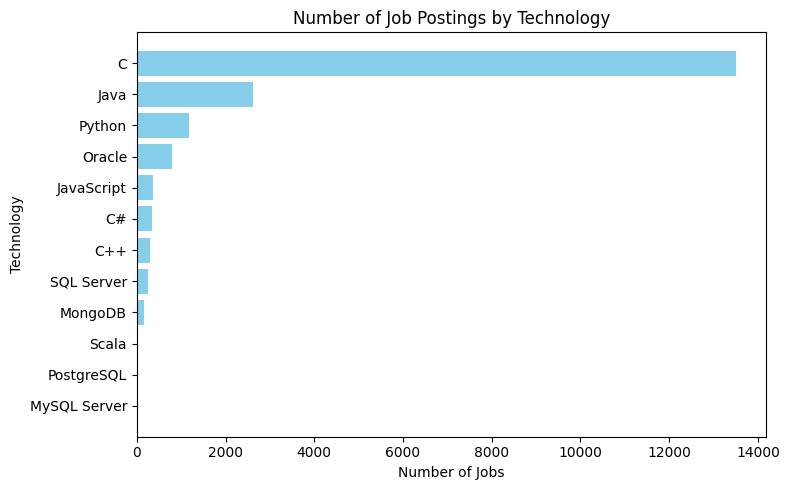

In [18]:
def get_number_of_jobs_T(technologies):
    response = requests.get(api_url)
    if response.ok:
        data = response.json()
        jobs_count = {}
        for technology in technologies:
            count = 0
            for job in data:
                if technology in job.get("Key Skills", ""):
                    count += 1
            jobs_count[technology] = count

        sorted_jobs_count = dict(sorted(jobs_count.items(), key=lambda item: item[1], reverse=True))
        return sorted_jobs_count

def plot_bar_chart(data, xlabel):
    plt.figure(figsize=(8, 5))
    plt.barh(list(data.keys()), list(data.values()), color='skyblue')
    plt.xlabel('Number of Jobs')
    plt.ylabel(xlabel)
    plt.title('Number of Job Postings by ' + xlabel)
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()


technologies = ["C", "C#", "C++", "Java", "JavaScript", "Python", "Scala", "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"]


jobs_count = get_number_of_jobs_T(technologies)

if jobs_count is not None:
    plot_bar_chart(jobs_count, 'Technology')